# Analyse des performances de l'entreprise et des tendances globales

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

##### Importation du csv dans un dataframe

In [3]:
df_ = pd.read_csv('dataset/clean_online_retail.csv')
df = df_.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797815 entries, 0 to 797814
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797815 non-null  object 
 1   StockCode    797815 non-null  object 
 2   Description  797815 non-null  object 
 3   Quantity     797815 non-null  int64  
 4   InvoiceDate  797815 non-null  object 
 5   Price        797815 non-null  float64
 6   Customer ID  797815 non-null  int64  
 7   Country      797815 non-null  object 
 8   TotalPrice   797815 non-null  float64
 9   cancelled    797815 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 60.9+ MB


## Chiffre d'affaire de l'entreprise

In [5]:
# Convertir la colonne "InvoiceDate" en type datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrer les données pour l'année 2010
df_2010 = df[(df['InvoiceDate'].dt.year == 2010)]

# Calculer le chiffre d'affaires en 2010
ca_2010 = df_2010['TotalPrice'].sum()

# Filtrer les données pour l'année 2011
df_2011 = df[(df['InvoiceDate'].dt.year == 2011)]

# Calculer le chiffre d'affaires en 2011
ca_2011 = df_2011['TotalPrice'].sum()

print("Chiffre d'affaires en 2010 :", ca_2010)
print("Chiffre d'affaires en 2011 :", ca_2011)

Chiffre d'affaires en 2010 : 7903701.624
Chiffre d'affaires en 2011 : 7726164.564


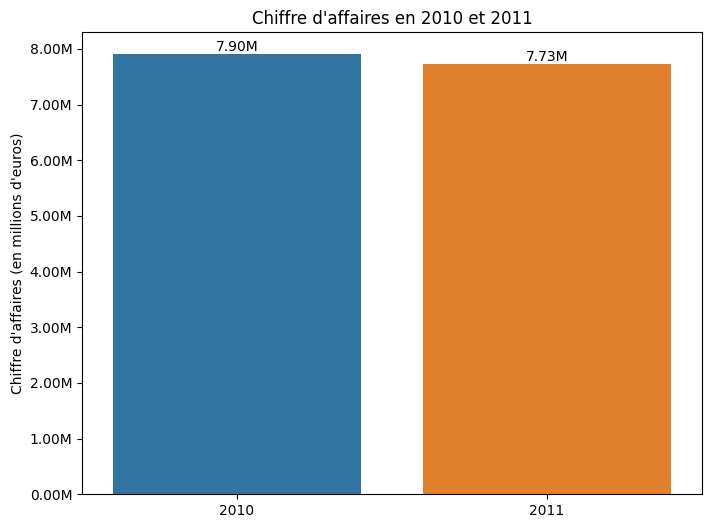

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Créer un DataFrame pour les chiffres d'affaires
ca_df = pd.DataFrame({'Année': ['2010', '2011'], 'Chiffre d\'affaires (en millions d\'euros)': [ca_2010, ca_2011]})

# Agrandir la taille de la figure
plt.figure(figsize=(8, 6))

# Créer le graphique avec Seaborn
ax = sns.barplot(x='Année', y='Chiffre d\'affaires (en millions d\'euros)', data=ca_df)

# Ajouter les labels aux barres
for i, v in enumerate(ca_df['Chiffre d\'affaires (en millions d\'euros)']):
    ax.text(i, v, f'{v/1000000:.2f}M', ha='center', va='bottom')

# Formater les labels de l'axe des y en millions avec 2 décimales
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000000:.2f}M'))

# Ajouter un titre
plt.title('Chiffre d\'affaires en 2010 et 2011')
ax.set(xlabel=None)
# Sauvegarder le graphique dans un dossier "img"
plt.savefig('img/graphique_ca.png')

# Afficher le graphique
plt.show()


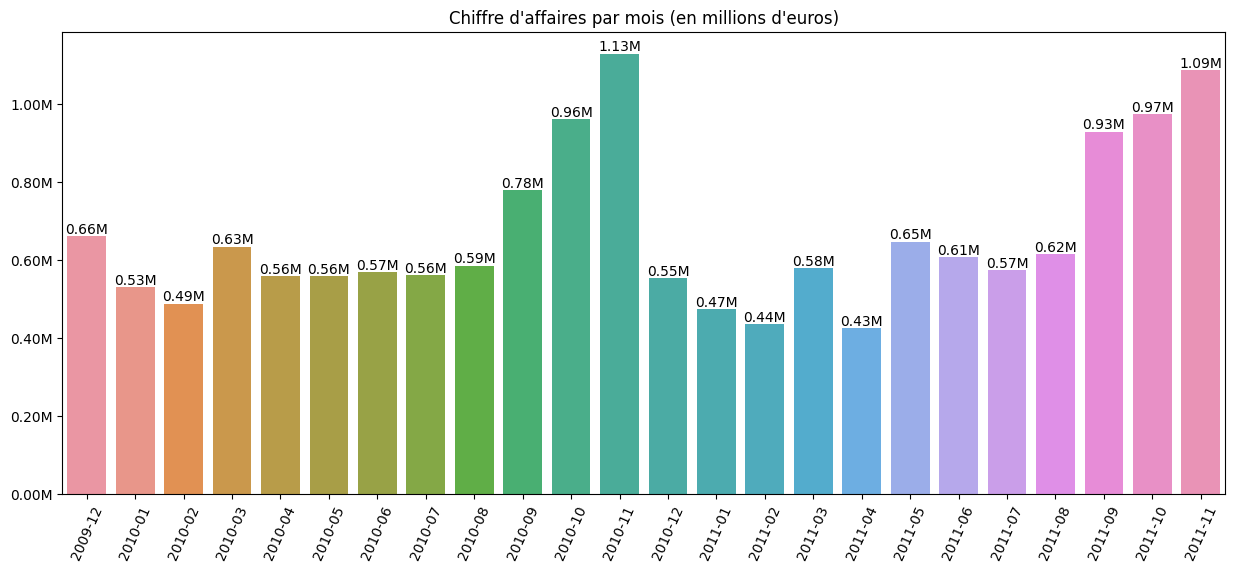

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Convertir la colonne "InvoiceDate" en type datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filtrer les données pour la plage de dates souhaitée
start_date = pd.to_datetime('2009-12-01')
end_date = pd.to_datetime('2011-11-30')
df_filtered = df[(df['InvoiceDate'] >= start_date) & (df['InvoiceDate'] <= end_date)]

# Calculer le chiffre d'affaires par mois
df_monthly_ca = df_filtered.groupby(df_filtered['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().reset_index()

# Agrandir la taille de la figure
plt.figure(figsize=(15, 6))

# Créer le graphique avec Seaborn
ax = sns.barplot(x='InvoiceDate', y='TotalPrice', data=df_monthly_ca)

# Ajouter les labels aux barres
for i, v in enumerate(df_monthly_ca['TotalPrice']):
    ax.text(i, v, f'{v/1000000:.2f}M', ha='center', va='bottom')

# Formater les labels de l'axe des x
plt.xticks(rotation=66)

# Formater les labels de l'axe des y en millions avec 2 décimales
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000000:.2f}M'))

# Ajouter un titre
plt.title('Chiffre d\'affaires par mois (en millions d\'euros)')
ax.set(xlabel=None, ylabel=None)
# Sauvegarder le graphique dans un dossier "img"
plt.savefig('img/graphique_ca_mensuel.png')

# Afficher le graphique
plt.show()


## Répartition géographique des ventes

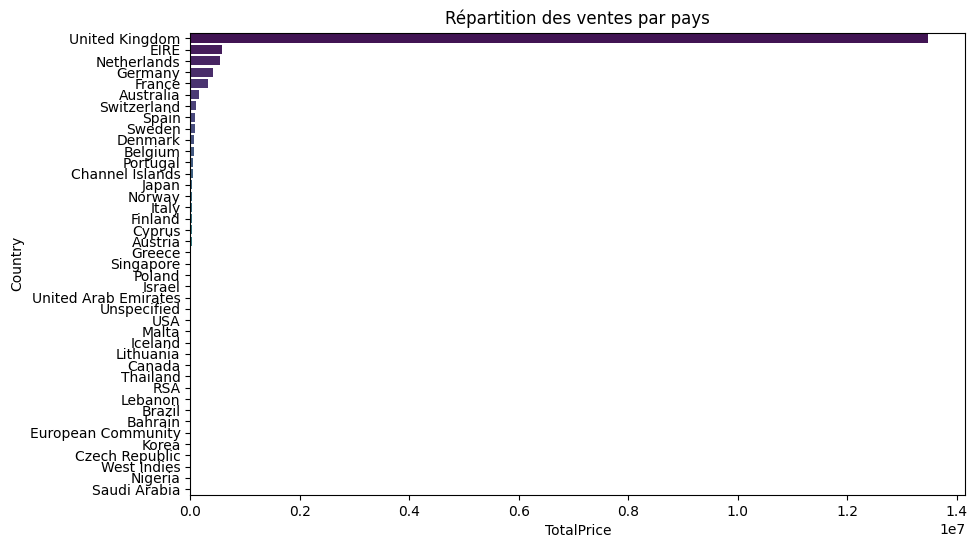

In [8]:
# Calculez le chiffre d'affaires total par pays
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Triez les pays par chiffre d'affaires décroissant
sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False)

# Configurez la taille de la figure
plt.figure(figsize=(10, 6))

# Créez un graphique à barres pour représenter la répartition des ventes par pays, en les triant par ordre décroissant
sns.barplot(data=sales_by_country, x='TotalPrice', y='Country', palette='viridis', order=sales_by_country['Country'])

# Ajoutez un titre au graphique
plt.title('Répartition des ventes par pays')

# Affichez le graphique
plt.show()


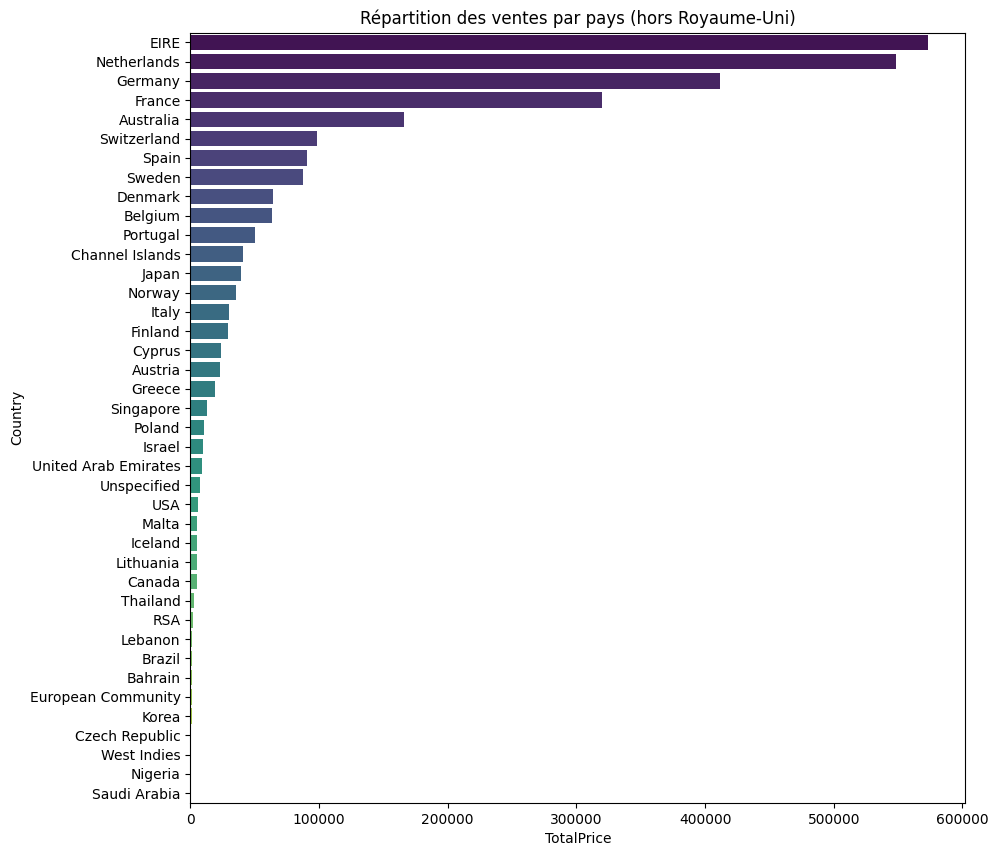

In [9]:
# Calculez le chiffre d'affaires total par pays, en excluant le Royaume-Uni
sales_by_country = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().reset_index()

# Triez les pays par chiffre d'affaires décroissant
sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False)

# Configurez la taille de la figure
plt.figure(figsize=(10, 10))

# Créez un graphique à barres pour représenter la répartition des ventes par pays, en les triant par ordre décroissant
sns.barplot(data=sales_by_country, x='TotalPrice', y='Country', palette='viridis', order=sales_by_country['Country'])

# Ajoutez un titre au graphique
plt.title('Répartition des ventes par pays (hors Royaume-Uni)')

# Affichez le graphique
plt.show()


In [10]:
# Compter le nombre de pays uniques dans le DataFrame
num_unique_countries = df['Country'].nunique()

# Afficher le résultat
print("Nombre de pays uniques :", num_unique_countries)


Nombre de pays uniques : 41


In [11]:
sales_by_country.sort_values(by= "TotalPrice", ascending=False)

,Country,TotalPrice
10,EIRE,573509.760
24,Netherlands,548330.700
14,Germany,411959.161
13,France,320046.260
0,Australia,166444.420
34,Switzerland,98779.410
32,Spain,91013.440
33,Sweden,87421.520
9,Denmark,64459.590
3,Belgium,63208.890


In [12]:
df_countries_purchase = df.groupby(['Country'], as_index=False)['TotalPrice'].agg('sum')
df_countries_purchase_asc = df_countries_purchase.sort_values('TotalPrice').head(10)
df_countries_purchase_desc = df_countries_purchase.sort_values('TotalPrice', ascending=False).head(10)

In [13]:
import plotly.graph_objects as go
import numpy as np

# Filtrer les données pour exclure le Royaume-Uni
df_countries_purchase = df[df['Country'] != 'United Kingdom']

# Trier les pays par montant total décroissant
df_countries_purchase_desc = df_countries_purchase.groupby('Country')['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False)

# Filtrer les pays avec un montant total inférieur à 20000
df_countries_purchase_desc = df_countries_purchase_desc[df_countries_purchase_desc['TotalPrice'] >= 20000]

# Créer le graphique à barres
fig = go.Figure(data=[
    go.Bar(
        x=df_countries_purchase_desc['Country'].astype(str),
        y=df_countries_purchase_desc['TotalPrice'],
        marker_opacity=1,
        marker={'color': df_countries_purchase_desc['TotalPrice'], 'colorscale': 'Rainbow'}
    )
])

# Ajouter les étiquettes de montant à chaque barre
formatted_labels = [f"{value/1000:.0f}k" for value in df_countries_purchase_desc['TotalPrice']]
fig.update_traces(text=formatted_labels, textposition='outside')

# Mettre à jour la mise en page du graphique
fig.update_layout(
    title="Répartition géographique des ventes (hors Royaume-Uni et pays avec un total des ventes inférieur à 20k€)",
    title_x=0.45,
    xaxis_title="Pays",
    yaxis_title="Montant Total (en millier d'euros)",
    plot_bgcolor='white',
    height = 600
)

# Afficher le graphique
fig.show()


In [14]:

sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()


In [15]:
from geopy.geocoders import Nominatim

def get_country_coordinates(country):
    geolocator = Nominatim(user_agent='my_app')  # Remplacez 'my_app' par le nom de votre application

    # Utilisez la méthode geocode pour obtenir les coordonnées du pays
    location = geolocator.geocode(country)
    
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None


In [16]:
# Créez une carte centrée sur les coordonnées du monde entier
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Initialisez un cluster de marqueurs
marker_cluster = MarkerCluster().add_to(world_map)

# Parcourez les données de chiffre d'affaires par pays
for index, row in sales_by_country.iterrows():
    # Récupérez les coordonnées du pays
    country = row['Country']
    lat, lon = get_country_coordinates(country)  # Remplacez get_country_coordinates par une fonction qui récupère les coordonnées du pays

    # Créez un marqueur proportionnel au chiffre d'affaires
    folium.CircleMarker(location=[lat, lon], radius=row['TotalPrice'] / 100000, color='blue', fill=True, fill_color='blue').add_to(marker_cluster)

# Affichez la carte
world_map


## Analyse produits les plus vendus

In [17]:
df_products = df.groupby(['Description'], as_index=False)['Quantity'].agg('sum')
df_products_asc = df_products.sort_values('Quantity').head(10)
df_products_asc['Quantity'] = df_products_asc['Quantity'] * (-1)
df_products_desc = df_products.sort_values('Quantity', ascending=False).head(10)

In [18]:
df_products_desc

,Description,Quantity
5183,WORLD WAR 2 GLIDERS ASSTD DESIGNS,103505
5061,WHITE HANGING HEART T-LIGHT HOLDER,88126
292,ASSORTED COLOUR BIRD ORNAMENT,77755
2397,JUMBO BAG RED RETROSPOT,73033
753,BROCADE RING PURSE,69343
3072,PACK OF 60 PINK PAISLEY CAKE CASES,54373
157,60 TEATIME FAIRY CAKE CASES,52502
3074,PACK OF 72 RETRO SPOT CAKE CASES,44480
3075,PACK OF 72 RETROSPOT CAKE CASES,44356
4517,SMALL POPCORN HOLDER,42592


In [19]:
fig = go.Figure(data=[
    go.Bar(name='Produits les plus vendus', 
           x=df_products_desc['Description'].astype(str), 
           y=df_products_desc['Quantity'],
           marker_opacity=1,
           marker={'color': df_products_desc['Quantity'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(text=df_products_desc['Quantity'],
                  textposition='outside')

fig.update_layout(title='Top 10 des produits les plus vendus',
                  title_x=0.45,
                  xaxis_title="Produits",
                  yaxis_title="Quantité vendue",
                  plot_bgcolor='white',
                  height = 600)
fig.show()

On vérifie qu'il ne s'agit pas de produits acheté une seule fois en grosse quantité

In [20]:
filtered_df = df[df['Description'] == 'WORLD WAR 2 GLIDERS ASSTD DESIGNS']

# Nombre d'invoices différentes pour le produit
num_invoices = filtered_df['Invoice'].nunique()

# Nombre de clients uniques pour le produit
num_customers = filtered_df['Customer ID'].nunique()

# Nombre de pays distincts pour le produit
num_countries = filtered_df['Country'].nunique()

# Afficher les résultats
print("Nombre d'invoices différentes pour le produit :", num_invoices)
print("Nombre de clients uniques pour le produit :", num_customers)
print("Nombre de pays distincts pour le produit :", num_countries)


Nombre d'invoices différentes pour le produit : 930
Nombre de clients uniques pour le produit : 482
Nombre de pays distincts pour le produit : 12


## Analyse des produits les plus retournés

In [21]:
# Filtrer les produits pour exclure la description "Discount"
df_filtered = df_products.query('Description != "Discount"')

# Trier les produits par quantité ascendante
df_products_asc = df_filtered.sort_values('Quantity').head(10)

# Multiplier la quantité par (-1) pour inverser le signe
df_products_asc['Quantity'] *= -1

In [22]:
import plotly.graph_objects as go

# Créer la figure avec le graphique à barres
fig = go.Figure(data=[
    go.Bar(name='Produits avec le plus de retours', 
           x=df_products_asc['Description'].astype(str), 
           y=df_products_asc['Quantity'],
           marker_opacity=1,
           marker={'color': df_products_desc['Quantity'],
                   'colorscale': 'Rainbow'}
          )
])

# Ajouter les étiquettes sur chaque barre
fig.update_traces(text=df_products_asc['Quantity'],
                  textposition='outside')

# Configurer le titre et les axes du graphique
fig.update_layout(title='Top 10 des produits les plus retournés',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Produits",
                  yaxis_title="Quantité retournée",
                  plot_bgcolor='white',
                  height = 600)

# Afficher le graphique
fig.show()


In [23]:
df_products_asc

,Description,Quantity
5040,WHITE CHERRY LIGHTS,105
4391,SILVER CHERRY LIGHTS,93
4793,TREE OF NOAH FESTIVE SCENTED CANDLE,46
1186,CRUK Commission,16
4093,SET 6 MINI SUSHI SET FRIDGE MAGNETS,12
5087,WHITE SCANDINAVIAN HEART CHRISTMAS,11
4882,VINTAGE BLUE VACUUM FLASK 0.5L,10
473,BLACK CHERRY LIGHTS,9
1624,FEATHER HEART LIGHTS,8
5075,WHITE ORCHID FLOWER LIGHTS,6


In [24]:
filtered_df = df[df['Description'] == 'WHITE CHERRY LIGHTS']

# Nombre d'invoices différentes pour le produit
num_invoices = filtered_df['Invoice'].nunique()

# Nombre de clients uniques pour le produit
num_customers = filtered_df['Customer ID'].nunique()

# Nombre de pays distincts pour le produit
num_countries = filtered_df['Country'].nunique()

# Afficher les résultats
print("Nombre d'invoices différentes pour le produit :", num_invoices)
print("Nombre de clients uniques pour le produit :", num_customers)
print("Nombre de pays distincts pour le produit :", num_countries)


Nombre d'invoices différentes pour le produit : 215
Nombre de clients uniques pour le produit : 145
Nombre de pays distincts pour le produit : 3


On observe ici que le produit le plus vendu est le 'World War 2 Glider', on voit également que parmis les produits les plus vendus il y a plusieurs boîtes à gâteau.  
A l'inverse ce sont les 'white cherry lights' qui ont fait l'objet du plus grand nombre de retours, parmis les produits les plus retournés on peut voir qu'il y a beaucoup de décorations.

## Analyse clients

### Top 10 des clients qui ont le plus dépensé

In [25]:
df_customers = df.groupby(['Customer ID', 'Country'], as_index=False)['TotalPrice'].agg('sum')
df_customers_desc = df_customers.sort_values('TotalPrice', ascending=False).head(10)

In [26]:
fig = go.Figure(data=[
    go.Bar(name='Clients qui ont le plus acheté', 
           x=df_customers_desc['Customer ID'].astype(str), 
           y=df_customers_desc['TotalPrice'],
           marker_opacity=1,
           hovertext=df_customers_desc['Country'],
           marker={'color': df_customers_desc['TotalPrice'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_layout(title='Top 10 des clients qui ont le plus acheté (montant total dépensé)',
                  title_x=0.45,
                  xaxis_title="Customer ID",
                  yaxis_title="Montant Total",
                  plot_bgcolor='white')
fig.show()

In [27]:
df_customers_desc = df_customers.sort_values('TotalPrice', ascending=False).head(10)
df_customers_desc

,Customer ID,Country,TotalPrice
5766,18102,United Kingdom,570380.61
2311,14646,Netherlands,523342.07
1821,14156,EIRE,296063.44
2575,14911,EIRE,265757.91
5114,17450,United Kingdom,231390.55
1360,13694,United Kingdom,190020.84
5175,17511,United Kingdom,168491.62
72,12415,Australia,143269.29
4348,16684,United Kingdom,141502.25
2725,15061,United Kingdom,124961.98


On peut voir que le client avec l'ID 18102 est celui qui a dépensé le plus ces deux dernières années avec près de 600k, on sait également qu'il vient du Royaume Uni.  
Parmis les 10 meilleurs clients, la plupart viennent du Royaume Uni ou d'Irlande